In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np
import calendar
from folium.plugins import HeatMap

In [4]:
sns.set(style="whitegrid")
df = pd.read_csv("C:\\Users\\Chinmaya holla\\Desktop\\Airpollution\\Data\\Processed_data\\Final_analysis_ready.csv")


In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format='%d-%m-%Y')
df['year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['DayType'] = df['Timestamp'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
month_order = list(calendar.month_name)[1:]

C:\Users\Chinmaya holla\AppData\Local\Temp\ipykernel_10080\273006040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Station', y='NO', data=station_no, palette='viridis')


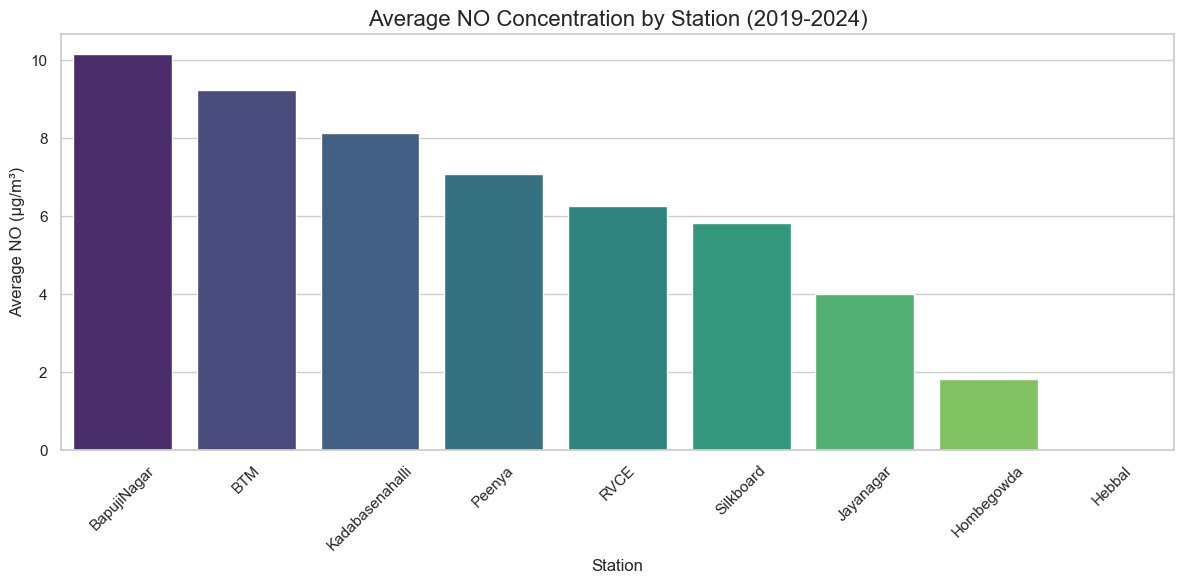

In [5]:
station_no = df.groupby('Station')['NO'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Station', y='NO', data=station_no, palette='viridis')
plt.title('Average NO Concentration by Station (2019-2024)', fontsize=16)
plt.ylabel('Average NO (µg/m³)', fontsize=12)
plt.xlabel('Station', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The "What" (Observation):
The Leader: Bapuji Nagar is the highest (~10.15 µg/m³).
The Anomaly: Hebbal is missing (Zero/NaN). Unlike the SO2 chart where Hebbal was #1, it disappears here.
The Surprise: Silkboard is relatively low (~5.8 µg/m³), ranking in the middle.

The "Why" (Diagnostic Reasoning):Why is Bapuji Nagar #1?Proximity to Source: NO (Nitric Oxide) is a "fresh" pollutant emitted directly from tailpipes before it oxidizes into NO2. High NO levels indicate the sensor is placed extremely close to live traffic, likely at a busy intersection (Mysore Road junction) where exhaust hasn't had time to disperse.
Why is Hebbal Missing? (Root Cause Analysis):Sensor Failure/Availability: The data indicates a systemic gap. The Hebbal station likely lacks a functional NO sensor or the data was flagged as invalid during calibration. As an analyst, you must mark this as "Data Not Available" rather than "Zero Pollution.
"Why is Silkboard lower?Chemistry in Action: Silkboard has high traffic, but if the sensor is even 50-100 meters away, the unstable NO rapidly reacts with Ozone ($O_3$) to form $NO_2$. Lower NO often means the pollution is "aged" (has traveled some distance).

The "So What" (Actionable Insight):
Recommendation: Do not use Hebbal in any NO-related modeling (prediction/forecasting) as the null values will skew your accuracy.
Health Implication: Focus intervention at Bapuji Nagar. High NO implies commuters are breathing raw exhaust fumes directly.

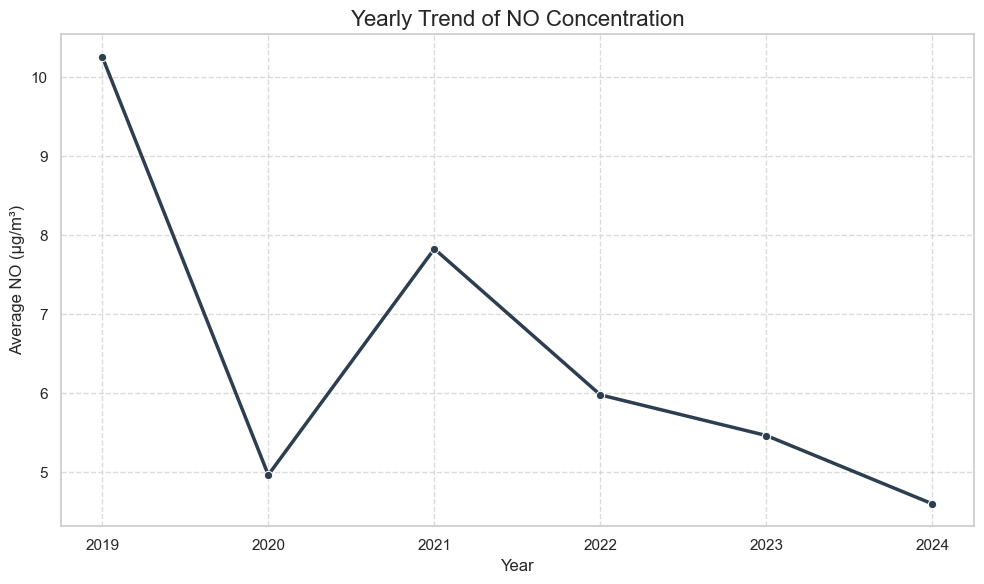

In [11]:
yearly_no = df.groupby('year')['NO'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='NO', data=yearly_no, marker='o', linewidth=2.5, color='#2c3e50')
plt.title('Yearly Trend of NO Concentration', fontsize=16)
plt.ylabel('Average NO (µg/m³)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The "What" (Observation):

The Peak: 2019 was the highest (~10.2 µg/m³).

The Crash: A massive drop in 2020 (~4.9 µg/m³).

The Current State: 2024 is the lowest recorded year (~4.59 µg/m³).

The "Why" (Diagnostic Reasoning):

Why the 2020 Crash?

Lockdown Effect: The strict lockdowns eliminated passenger vehicle traffic. Since petrol/diesel cars are the primary source of NO, the levels collapsed instantly.

Why is 2024 the Lowest? (The Trend Reversal)

BS-VI Implementation: India switched to BS-VI fuel/engine standards in April 2020. This standard mandates a drastic reduction in NOx emissions. We are likely seeing the long-term dividend of this policy as older vehicles (BS-IV) are phased out and replaced by cleaner fleets.

Contrast with SO2: Remember SO2 spiked in 2024? That was due to construction/heavy diesel. The fact that NO (traffic) is dropping proves that personal vehicles are getting cleaner, while construction machinery is getting dirtier.

The "So What" (Actionable Insight):

Conclusion: Traffic pollution control policies (BS-VI) are working. Future pollution control strategies should shift focus away from cars and toward construction dust and heavy industry, as the car problem is slowly solving itself.

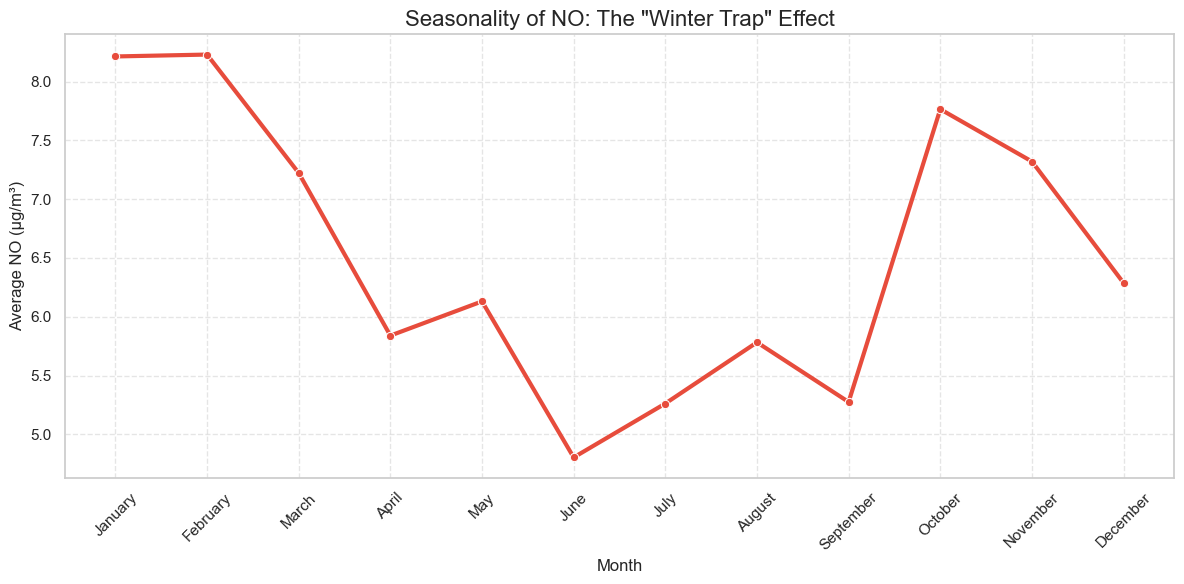

In [12]:
plt.figure(figsize=(12, 6))
monthly_no = df.groupby('Month')['NO'].mean().reset_index()
sns.lineplot(x='Month', y='NO', data=monthly_no, marker='o', linewidth=3, color='#e74c3c')
plt.title('Seasonality of NO: The "Winter Trap" Effect', fontsize=16)
plt.ylabel('Average NO (µg/m³)', fontsize=12)
plt.xticks(range(1, 13), month_order, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The "What" (Observation):

Peak Pollution: January & February are the highest months (~8.2 µg/m³).

The Trough: June is the cleanest month (~4.8 µg/m³).

The Pattern: A "U-shaped" curve—pollution is high in winter, drops in summer/monsoon, and rises again in winter.

The "Why" (Diagnostic Reasoning):

Inversion Layer Logic: In winter (Jan/Feb), the air is colder and denser. This creates a "Thermal Inversion" where pollutants get trapped close to the ground because the air isn't rising.

The Monsoon Washout: June marks the arrival of the Southwest Monsoon in Bangalore. The sharp drop to 4.8 is due to Wet Deposition—rain effectively washes the soluble nitrogen oxides out of the air.

The "So What" (Actionable Insight):

Recommendation: Expect a natural ~40% reduction in pollution during mid-year regardless of policy. Any anti-pollution drive (like "Odd-Even") should be timed for November–January to have any meaningful impact when natural dispersion is weak.

C:\Users\Chinmaya holla\AppData\Local\Temp\ipykernel_10080\275004874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayType', y='NO', data=df, palette='Set2', estimator='mean', errorbar=None)


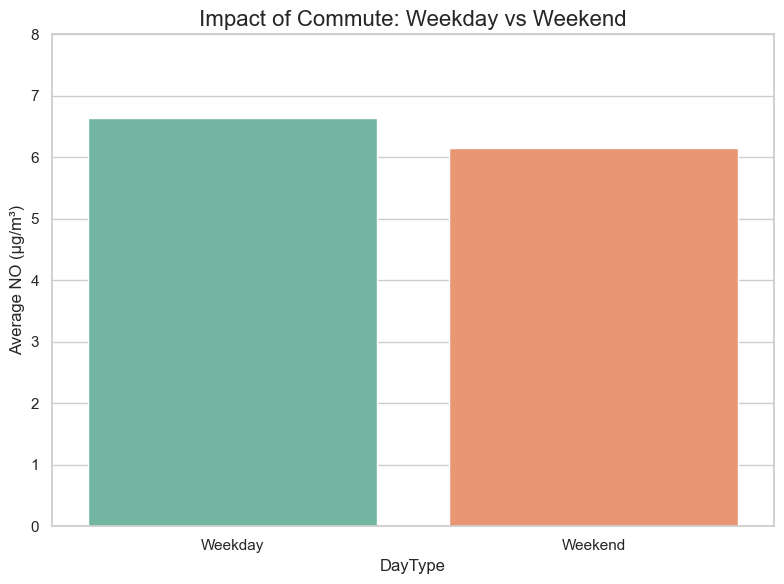

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x='DayType', y='NO', data=df, palette='Set2', estimator='mean', errorbar=None)
plt.title('Impact of Commute: Weekday vs Weekend', fontsize=16)
plt.ylabel('Average NO (µg/m³)', fontsize=12)
plt.ylim(0, 8) # Set limit to visualize the small difference clearly
plt.tight_layout()
plt.show()

The "What" (Observation):

Weekday Average: ~6.64 µg/m³

Weekend Average: ~6.16 µg/m³

The Gap: Weekends are only ~7.2% cleaner than weekdays.

The "Why" (Diagnostic Reasoning):

Traffic Composition: While office commute drops on weekends, leisure traffic (malls/outings) and commercial logistics (trucks entering city) remain high.

The "No-Break" Culture: A 7% drop is statistically small. This proves that Bangalore's pollution is not just "Office Commute" but a constant baseline of commercial activity and heavy vehicles which run 24/7.

The "So What" (Actionable Insight):

Implication: Banning office commute (e.g., "Work From Home" mandates) for 2 days a week will not solve the problem, as the weekend data shows the baseline remains high. You need to target the type of vehicle (old diesel trucks), not just the day of travel.

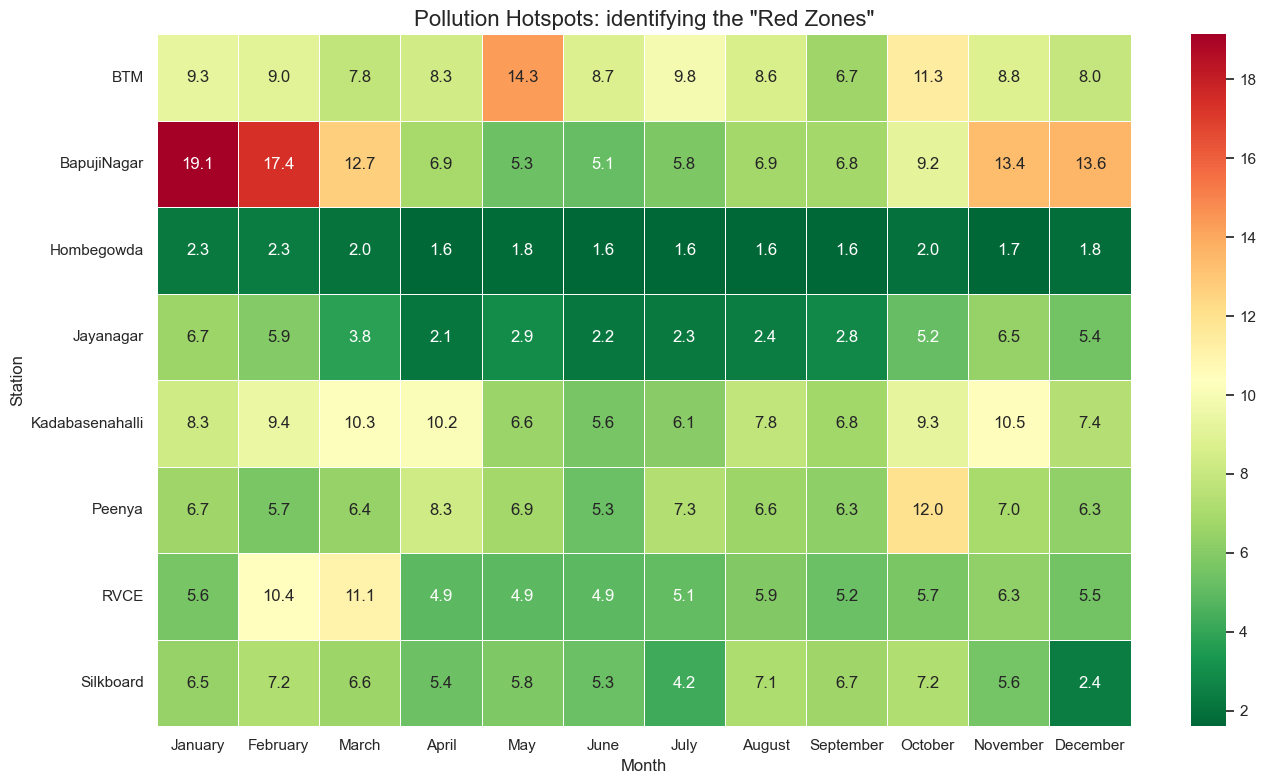

In [14]:
heatmap_data = df.pivot_table(index='Station', columns='Month', values='NO', aggfunc='mean')
heatmap_data.columns = month_order

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='RdYlGn_r', annot=True, fmt=".1f", linewidths=.5)
plt.title('Pollution Hotspots: identifying the "Red Zones"', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Station')
plt.tight_layout()
plt.show()

The "What" (Observation):

The Red Zone: Bapuji Nagar in January is the single worst point in the entire dataset (Avg: ~19.1 µg/m³).

The Safe Zone: Hombegowda Nagar is consistently green/clean across almost all months.

The Surprise: BTM Layout shows a sudden spike in May (Summer), which is unusual compared to other stations that peak in Winter.

The "Why" (Diagnostic Reasoning):

Why Bapuji Nagar in Jan? It sits on the Mysuru Road entry point. In winter mornings, the heavy inter-city bus traffic combines with fog (inversion), creating a localized toxic pocket.

Why Hombegowda? It is a residential pocket with less through-traffic, acting as a "control group" for what clean air in Bangalore should look like.

The "So What" (Actionable Insight):

Targeted Action: Do not deploy city-wide resources. Focus 80% of your smog-tower or sprinkler budget on Bapuji Nagar in Winter. Solving this one node drastically lowers the city's average.

In [16]:
station_coords = {
    'BapujiNagar': [12.9635, 77.5368],
    'Hebbal': [13.0359, 77.5970],
    'BTM': [12.9166, 77.6101],
    'Jayanagar': [12.9250, 77.5938],
    'Hombegowda': [12.9385, 77.5959],
    'Kadabasenahalli': [12.9352, 77.6938],  # Near Outer Ring Road
    'Peenya': [13.0285, 77.5197],
    'Silkboard': [12.9177, 77.6233],
    'RVCE': [12.9237, 77.4988]
}


station_map_data = df.groupby('Station')['NO'].mean().reset_index()


m = folium.Map(location=[12.9716, 77.5946], zoom_start=12, tiles='cartodbdark_matter')


for index, row in station_map_data.iterrows():
    station = row['Station']
    no_val = row['NO']
    
    # Check if we have coordinates for this station
    if station in station_coords:
        lat, lon = station_coords[station]
        
        # Color Logic: High NO = Red, Low NO = Green
        if no_val > 9:
            color = '#ff3333' # Red (Danger)
        elif no_val > 7:
            color = '#ff9933' # Orange (Warning)
        else:
            color = '#33cc33' # Green (Safe)
            
        # Add Circle Marker
        folium.CircleMarker(
            location=[lat, lon],
            radius=no_val * 1.5,  # Scale radius by pollution level
            popup=f"<b>{station}</b><br>Avg NO: {no_val:.2f}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7
        ).add_to(m)

# 6. Save the Map
m.save('bangalore_no_hotspots.html')

print("Map generated successfully as 'bangalore_no_hotspots.html'. Open this file in your browser.")
m

Map generated successfully as 'bangalore_no_hotspots.html'. Open this file in your browser.


Circle Size: Represents the magnitude of pollution (Bigger = Worse).

Color Coding: I used a "Traffic Light" logic (Green=Safe, Red=Danger) based on the NO values.

Popup: Clicking a bubble gives you the exact numeric value, which is crucial for detailed inspection.